# Melbourne Housing Market

Dataset referente ao mercado imobiliario de Melbourne.(preciso melhorar a descrição)


Dataset encontra-se disponivel no endereço: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [239]:
df = pd.read_csv(r"C:\Users\dougl\OneDrive\Área de Trabalho\Projetos GitHub\Melbourne_house\archive\Melbourne_housing_FULL.csv")

In [240]:
pd.set_option('display.max_columns',None)

In [241]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [242]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
27421,Westmeadows,7 Forman St,4,h,760000.0,SP,YPA,11/11/2017,16.5,3049.0,4.0,2.0,2.0,565.0,NaN,NaN,Hume City Council,-37.6799,144.8901,Northern Metropolitan,2474.0
13674,South Yarra,9/384 Toorak Rd,2,u,485000.0,PI,Biggin,8/04/2017,3.3,3141.0,2.0,1.0,0.0,5467.0,73.0,1970.0,Melbourne City Council,-37.8406,145.0035,Southern Metropolitan,14887.0
3777,Elsternwick,3/477 Kooyong Rd,3,t,1071000.0,S,Biggin,16/04/2016,8.5,3185.0,3.0,2.0,2.0,179.0,125.0,2000.0,Glen Eira City Council,-37.8961,145.0125,Southern Metropolitan,4898.0
827,Balaclava,1/34 Gourlay St,2,t,1015000.0,S,Gary,7/11/2016,6.6,3183.0,2.0,1.0,2.0,114.0,120.0,2000.0,Port Phillip City Council,-37.8723,144.9961,Southern Metropolitan,2952.0
2507,Burwood,15 Loudon Rd,5,h,1590000.0,S,Jellis,3/09/2016,11.7,3125.0,4.0,3.0,2.0,661.0,253.0,1940.0,Monash City Council,-37.8480,145.0980,Southern Metropolitan,5678.0


In [243]:
df.tail(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,2.0,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [244]:
df.shape

(34857, 21)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [246]:
#Corrigindo o nome da coluna:
df.rename(columns={'Bedroom2': 'Bedroom'}, inplace = True)

***

Localizando e tratando as duplicidades:

In [247]:
df.duplicated().value_counts()

False    34856
True         1
dtype: int64

In [248]:
df = df.drop_duplicates()

In [249]:
df.duplicated().value_counts()

False    34856
dtype: int64

***

Visualização e tratamento de Outliers

In [250]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34856.000000,2.724700e+04,34855.000000,34855.000000,26639.000000,26630.000000,26128.000000,23046.000000,13741.000000,15550.000000,26880.000000,26880.000000,34853.000000
mean,3.031013,1.050173e+06,11.184808,3116.062430,3.084650,1.624747,1.728835,593.607177,160.251616,1965.287653,-37.810634,145.001845,7572.962901
std,0.969947,6.414671e+05,6.788952,109.025437,0.980708,0.724177,1.010789,3398.915462,401.281270,37.328340,0.090281,0.120167,4428.131940
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754092,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


In [251]:
df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

Rooms                 3.0000
Price            870000.0000
Distance             10.3000
Postcode           3103.0000
Bedroom               3.0000
Bathroom              2.0000
Car                   2.0000
Landsize            521.0000
BuildingArea        136.0000
YearBuilt          1970.0000
Lattitude           -37.8076
Longtitude          145.0078
Propertycount      6763.0000
Name: 0.5, dtype: float64

<AxesSubplot: >

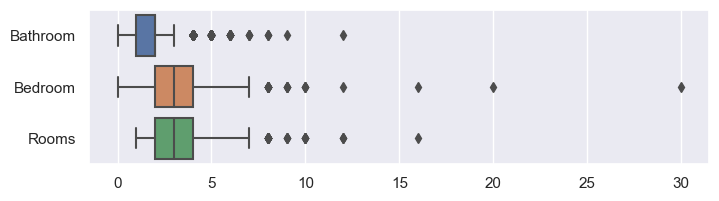

In [252]:
sns.set(rc={"figure.figsize":(8, 2)})
sns.boxplot(data=df[["Bathroom", "Bedroom","Rooms"]], orient="h")

melhorar a descricao


Conforme visualizado nos Boxplot acima, existe outliers para serem eleminados

In [253]:
df.drop(df.loc[df['Bathroom']>=4].index, inplace=True)
df.drop(df.loc[df['Bedroom']>=8].index, inplace=True)
df.drop(df.loc[df['Rooms']>=8].index, inplace=True)
df.drop(df.loc[df['Bathroom']<1].index, inplace=True)

<AxesSubplot: >

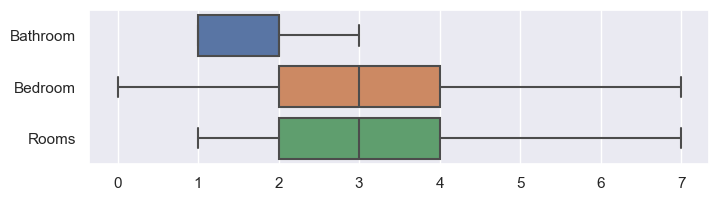

In [254]:
sns.set(rc={"figure.figsize":(8, 2)})
sns.boxplot(data=df[["Bathroom", "Bedroom","Rooms"]], orient="h")

<AxesSubplot: xlabel='Landsize'>

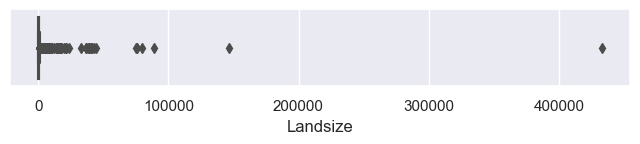

In [255]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['Landsize'])

In [256]:
df.drop(df.loc[df['Landsize']>=1300].index, inplace=True)

<AxesSubplot: xlabel='Landsize'>

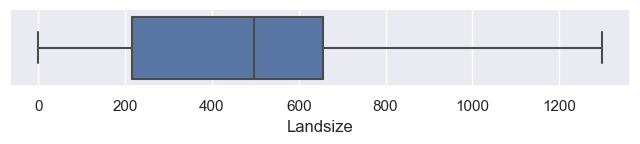

In [257]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['Landsize'])

<AxesSubplot: xlabel='BuildingArea'>

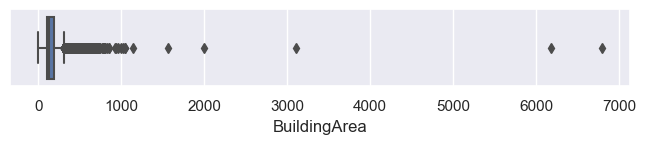

In [258]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['BuildingArea'])

In [278]:
df.drop(df.loc[df['BuildingArea']>=300].index, inplace=True)

<AxesSubplot: xlabel='BuildingArea'>

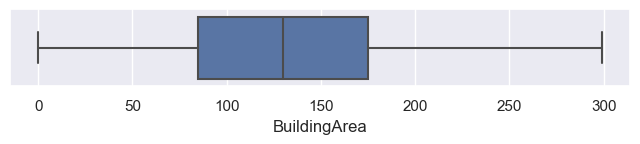

In [279]:
sns.set(rc={"figure.figsize":(8, 1)})
sns.boxplot(x=df['BuildingArea'])

******************************

Verificando e tratando valores nulos:

In [297]:
df.isnull().sum().sort_values(ascending=False)

YearBuilt        18806
Landsize         11489
Bathroom          8214
Bedroom           8205
Longtitude        7967
Lattitude         7967
Propertycount        3
Regionname           3
CouncilArea          3
Distance             1
Postcode             1
BuildingArea         0
Suburb               0
Car                  0
Address              0
Date                 0
SellerG              0
Method               0
Price                0
Type                 0
Rooms                0
Garage               0
dtype: int64

É possivel visualizar acima, os dados que apresentão algum tipo de campo nulo. será iniciado o tratamento apartir destes dados.

Primeiro passo sera o preenchimento dos campos vazios referente ao tamanho da casa(BuildingArea), com base na mediana das casas com o mesmo numero de comodos(Rooms)até onde apresenta 7 comodos.
Para melhor obtebçao destes dados res utilizado um dataset temporario onde sera deletados todos os campos com erro.

In [315]:
df_limpo_temporario = df.dropna()
print(df_limpo_temporario.isnull().sum().sort_values())

Suburb           0
Regionname       0
Longtitude       0
Lattitude        0
CouncilArea      0
YearBuilt        0
BuildingArea     0
Landsize         0
Car              0
Bathroom         0
Bedroom          0
Postcode         0
Distance         0
Date             0
SellerG          0
Method           0
Price            0
Type             0
Rooms            0
Address          0
Propertycount    0
Garage           0
dtype: int64


In [316]:
df_limpo_temporario.groupby("Rooms").agg({"BuildingArea":['min','mean', 'median','max']})

BuildingArea                           
               min        mean median     max
Rooms                                        
1              1.0   51.848911   50.0  207.00
2              0.0   88.393088   85.0  296.00
3              0.0  133.920869  130.0  296.00
4              0.0  188.654479  188.0  298.21
5              0.0  226.466772  242.0  299.00
6              0.0  230.108696  245.5  295.00
7            131.0  206.000000  200.0  287.00

In [317]:
df.loc[df['Rooms'] == 1, 'BuildingArea'] = df.loc[df['Rooms'] == 1, 'BuildingArea'].fillna(50)
df.loc[df['Rooms'] == 2, 'BuildingArea'] = df.loc[df['Rooms'] == 2, 'BuildingArea'].fillna(85)
df.loc[df['Rooms'] == 3, 'BuildingArea'] = df.loc[df['Rooms'] == 3, 'BuildingArea'].fillna(130)
df.loc[df['Rooms'] == 4, 'BuildingArea'] = df.loc[df['Rooms'] == 4, 'BuildingArea'].fillna(188)
df.loc[df['Rooms'] == 5, 'BuildingArea'] = df.loc[df['Rooms'] == 5, 'BuildingArea'].fillna(242)
df.loc[df['Rooms'] == 6, 'BuildingArea'] = df.loc[df['Rooms'] == 6, 'BuildingArea'].fillna(288)
df.loc[df['Rooms'] == 7, 'BuildingArea'] = df.loc[df['Rooms'] == 7, 'BuildingArea'].fillna(355)

Agora sera preenchido os campos vazios referente ao preço(Price), com base na mediana das casas com o mesmo numero de comodos(Rooms),até onde apresenta 7 comodos. 
Para melhor obtebçao destes dados res utilizado um dataset temporario onde sera deletados todos os campos com erro.

In [318]:
df_limpo_temporario.groupby("Rooms").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1        85000.0  4.091332e+05   380000.0  1820000.0
2       240000.0  7.395047e+05   670000.0  3625000.0
3       283000.0  1.005166e+06   900000.0  9000000.0
4       131000.0  1.289779e+06  1209500.0  6370000.0
5       355000.0  1.548633e+06  1550000.0  4802500.0
6       506000.0  1.578620e+06  1620500.0  3000000.0
7      1205000.0  1.735000e+06  2000000.0  2000000.0

In [319]:
df.loc[df['Rooms'] == 1, 'Price'] = df.loc[df['Rooms'] == 1, 'Price'].fillna(380000)
df.loc[df['Rooms'] == 2, 'Price'] = df.loc[df['Rooms'] == 2, 'Price'].fillna(670000)
df.loc[df['Rooms'] == 3, 'Price'] = df.loc[df['Rooms'] == 3, 'Price'].fillna(900000)
df.loc[df['Rooms'] == 4, 'Price'] = df.loc[df['Rooms'] == 4, 'Price'].fillna(1209500)
df.loc[df['Rooms'] == 5, 'Price'] = df.loc[df['Rooms'] == 5, 'Price'].fillna(1550000)
df.loc[df['Rooms'] == 6, 'Price'] = df.loc[df['Rooms'] == 6, 'Price'].fillna(1620500)
df.loc[df['Rooms'] == 7, 'Price'] = df.loc[df['Rooms'] == 7, 'Price'].fillna(2000000)

Para o campo Car(Garagem), será atribuido valor zero(0) para todos os valores nulos, mas para tornar mais utilizavel, sera criada uma nova coluna com dados booleanos, com o nome "Garage", onde sera considerado verdadeiro para sim, e falso para não.

In [320]:
df['Car'].fillna(0, inplace=True)

In [321]:
df['Garage'] = df['Car'].map(lambda x:0 if x ==0 else 1)

Landsize

In [322]:
df_limpo_temporario.groupby("Regionname").agg({"Landsize":['min','mean', 'median','max','std',]})

Landsize                                       
                                min        mean median     max         std
Regionname                                                                
Eastern Metropolitan            0.0  594.007018  652.0  1267.0  252.587155
Eastern Victoria              196.0  760.704545  756.0  1254.0  198.800839
Northern Metropolitan           0.0  354.005798  326.0  1262.0  251.149434
Northern Victoria             151.0  679.673684  681.0  1290.0  190.793552
South-Eastern Metropolitan      0.0  577.430712  602.5  1200.0  195.118278
Southern Metropolitan           0.0  383.820495  338.0  1298.0  302.381480
Western Metropolitan            0.0  423.625426  446.0  1218.0  236.916620
Western Victoria              180.0  636.728571  616.0  1241.0  133.950772

In [323]:
df.loc[df['Regionname'] == 'Eastern Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Eastern Victoria', 'Landsize'].fillna(756)
df.loc[df['Regionname'] == 'Northern Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Northern Victoria', 'Landsize'].fillna(681)
df.loc[df['Regionname'] == 'Western Victoria', 'Landsize'] = df.loc[df['Regionname'] == 'Western Victoria', 'Landsize'].fillna(616)


In [324]:
df_limpo_temporario.groupby("Postcode").agg({"Landsize":['min','mean', 'median','max','std',]})

Landsize                                       
              min        mean median     max         std
Postcode                                                
3000.0        0.0   83.520833    0.0  1136.0  278.324393
3002.0        0.0  132.307692    0.0   997.0  278.548734
3003.0        0.0  147.705882    8.5   862.0  240.876874
3006.0        0.0   49.848485    0.0   760.0  162.328202
3008.0        0.0   65.500000   65.5   131.0   92.630988
...           ...         ...    ...     ...         ...
3810.0      613.0  769.222222  756.0  1000.0  131.758091
3910.0      196.0  560.166667  655.0   869.0  280.496999
3976.0      301.0  531.666667  640.0   654.0  199.885801
3977.0      390.0  593.692308  579.0  1073.0  172.695486
3978.0      756.0  756.000000  756.0   756.0         NaN

[197 rows x 5 columns]

In [325]:
#somente para consulta, apagar apos termino
df.isnull().sum().sort_values(ascending=False)

YearBuilt        18806
Landsize         11489
Bathroom          8214
Bedroom           8205
Longtitude        7967
Lattitude         7967
Propertycount        3
Regionname           3
CouncilArea          3
Distance             1
Postcode             1
BuildingArea         0
Suburb               0
Car                  0
Address              0
Date                 0
SellerG              0
Method               0
Price                0
Type                 0
Rooms                0
Garage               0
dtype: int64

In [326]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Garage
0,Abbotsford,68 Studley St,2,h,670000.0,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,85.0,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,1
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,1
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0
3,Abbotsford,18/659 Victoria St,3,u,900000.0,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,130.0,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,1
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,188.0,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,1
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,1
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,1
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,0.0,NaN,130.0,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,0


Para estimar um valor, é necessario que alguns campos tenha obrigatoriamente valores.
* Bedroom2 possui 8217 campos nulos.
* Bathroom possui 8226 campos nulos.
* Price possui 7610 campos nulos.


In [327]:
#df.dropna(subset=["Bedroom2"],inplace=True)
#df.dropna(subset=["Bathroom"],inplace=True)
#df.dropna(subset=["Price"],inplace=True)
#df.dropna(subset=["BuildingArea"],inplace=True)


Precisa verificar endereços duplicados

Precisa verificar outliers e desconsiderar valores para 0

Testar a media e mediana de acordo com o tamanho da amostra(City Council e/ou Suburb)

* * * * * * * * * * * * * * * * * * * * * *

codigo abaixo para testar

In [328]:
df[df["Bedroom"]>=8].sum().value_counts()

0.0    22
dtype: int64

In [329]:
df.loc[(df['Bathroom']==1)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Garage
0,Abbotsford,68 Studley St,2,h,670000.0,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,85.0,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,1
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,1
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,1
8,Abbotsford,53 Turner St,2,h,670000.0,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,85.0,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34843,Williamstown North,32 Edina St,3,h,830000.0,S,hockingstuart,24/02/2018,6.8,3016.0,3.0,1.0,2.0,345.0,130.0,1949.0,Hobsons Bay City Council,-37.85545,144.88118,Western Metropolitan,802.0,1
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,3.0,1.0,0.0,288.0,130.0,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0,0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,188.0,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,1
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,1


In [330]:
df.loc[(df['Bedroom2']>=8)]

KeyError: 'Bedroom2'

In [ ]:
#apagar apos consultas
df["Rooms"].value_counts()

3     15083
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

In [ ]:
#apagar apos consultas
df[df["BuildingArea"]< 40].sum()

Suburb           AbbotsfordAbbotsfordAlbert ParkAltonaAltonaArm...
Address          138/56 Nicholson St166 Gipps St13/52 Moubray S...
Rooms                                                          855
Type             uhuhuuuthtttutthuuuhhhhhutuuuuttuhhhuthuuhthtt...
Price                                                  224966384.0
Method           SSSSSPPIPISVBSSSSSSPISPSPISSSPSSSVBSSPSSPISSPS...
SellerG          JellisBigginMarshallhockingstuartBarlowMarshal...
Date             18/03/201725/02/201725/02/20178/10/201628/05/2...
Distance                                                    3214.5
Postcode                                                  971664.0
Bedroom                                                      854.0
Bathroom                                                     495.0
Car                                                          474.0
Landsize                                                  106873.0
BuildingArea                                               488

In [ ]:
df_teste_area['BuildingArea'].isnull().sum()

192

In [ ]:
df_teste_area["Suburb"].value_counts()

Glen Iris    381
Name: Suburb, dtype: int64

In [ ]:

# Agrupa os dados por número de quartos
grouped = df.groupby('Rooms')

# Calcula as estatísticas descritivas para o tamanho da casa para cada grupo
size_stats = grouped['BuildingArea'].describe()

# Seleciona apenas as colunas que queremos visualizar
size_stats = size_stats[['min', '25%', '50%', '75%', 'max']]

# Exibe as estatísticas descritivas para um número específico de quartos (por exemplo, 3 quartos)
print(size_stats.loc[3])


min       0.0
25%     130.0
50%     130.0
75%     130.0
max    3647.0
Name: 3, dtype: float64


In [ ]:
size_stats = df_teste_area['BuildingArea'].describe()

In [ ]:
print(size_stats)

count    26559.000000
mean       149.306768
std        290.845691
min          0.000000
25%        101.000000
50%        130.000000
75%        189.000000
max      44515.000000
Name: BuildingArea, dtype: float64


In [ ]:
df_teste_area_Southern_Metropolitan.groupby("Rooms").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1       240000.0  4.339777e+05   393500.0  2100000.0
2       305000.0  8.090765e+05   700000.0  2875000.0
3       570000.0  1.479962e+06  1400000.0  6250000.0
4       131000.0  2.103248e+06  1925000.0  7650000.0
5       950000.0  2.635246e+06  2420000.0  8000000.0
6      1300000.0  3.270471e+06  2835000.0  6500000.0
7      1642000.0  2.121000e+06  2121000.0  2600000.0
8      2950000.0  2.950000e+06  2950000.0  2950000.0
10     2315000.0  2.315000e+06  2315000.0  2315000.0

In [ ]:
df_limpo_temporario.groupby("Cou").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1       170000.0  4.186654e+05   380000.0  2100000.0
2       250000.0  7.470382e+05   670000.0  2875000.0
3       283000.0  1.034565e+06   900000.0  9000000.0
4       131000.0  1.384635e+06  1216000.0  7650000.0
5       355000.0  1.881408e+06  1660000.0  8000000.0
6       506000.0  2.128098e+06  1776000.0  6500000.0
7      1205000.0  1.914571e+06  1950000.0  2705000.0
8       741000.0  1.335500e+06   825500.0  2950000.0
10     2315000.0  2.315000e+06  2315000.0  2315000.0
12      710000.0  7.100000e+05   710000.0   710000.0

In [ ]:
df_teste_area_Northern_Metropolitan = df_limpo_temporario.loc[    
    (df['Price']>=1)&
    (df['Bedroom']>=1)&
    (df['Bathroom']>=1)&
    (df['Rooms']>=1)&
    (df['Regionname']=='Northern Metropolitan')]

In [ ]:
df_teste_area_Northern_Metropolitan.groupby("Rooms").agg({"Price":['min','mean', 'median','max']})

Price                                    
             min          mean     median        max
Rooms                                               
1       216000.0  4.119634e+05   385000.0   947500.0
2       250000.0  7.491236e+05   684000.0  2400000.0
3       301000.0  9.086931e+05   800500.0  3000000.0
4       145000.0  1.049462e+06   853666.5  4011000.0
5       591000.0  1.199599e+06  1000000.0  3200000.0
6       506000.0  1.307333e+06  1427500.0  2000000.0
7      1205000.0  1.205000e+06  1205000.0  1205000.0
8       741000.0  7.410000e+05   741000.0   741000.0

In [ ]:
df_teste_area = df_limpo_temporario.loc[    
    (df['Price'])&
    (df['Bedroom']== 1)&
    (df['Bathroom']==1)&
    (df['Rooms'])]

In [ ]:
df_teste_area.groupby("Rooms").agg({"BuildingArea":['min','mean', 'median','max',]})

BuildingArea                       
               min     mean median    max
Rooms                                    
1              1.0  52.1808   50.0  999.0

In [ ]:
df_teste_area.groupby(df["Rooms"]==2).agg({"BuildingArea":['min','mean', 'median','max']})

BuildingArea                       
               min     mean median    max
Rooms                                    
False          1.0  52.1808   50.0  999.0

utilizar abaixo para substituir

In [ ]:
df_limpo_temporario.groupby("CouncilArea").agg({"Landsize":['min','mean', 'median','max']})

Landsize                               
                                    min          mean  median      max
CouncilArea                                                           
Banyule City Council                0.0    594.569007   598.0   4786.0
Bayside City Council                0.0    538.616022   567.0   9838.0
Boroondara City Council             0.0    585.503704   613.0   8140.0
Brimbank City Council               0.0    563.454327   575.0   3977.0
Cardinia Shire Council            430.0    778.833333   777.5   1034.0
Casey City Council                227.0    735.628571   629.0   4208.0
Darebin City Council                0.0    391.839506   387.0   4679.0
Frankston City Council            150.0    783.011494   630.0  10120.0
Glen Eira City Council              0.0    456.030829   429.0   5289.0
Greater Dandenong City Council    141.0    604.058824   603.0   1034.0
Hobsons Bay City Council            0.0    391.588235   367.0   2522.0
Hume City Council                   0.0    606.925641   588.0  10590.0
Kingston City Council               0.0    556.435407   564.0   7514.0
Knox City Council                 137.0    706.786408   722.0   2033.0
Macedon Ranges Shire Council      412.0  11980.363636  1290.0  42800.0
Manningham City Council             0.0    693.235955   669.0   5022.0
Maribyrnong City Council            0.0    513.714286   290.0  37000.0
Maroondah City Council              0.0    726.616822   731.0   1880.0
Melbourne City Council              0.0    397.028509   104.5  21715.0
Melton City Council                 0.0    631.616822   603.0   1709.0
Mitchell Shire Council            502.0    713.750000   681.0    991.0
Monash City Council                 0.0    562.090301   650.0   1590.0
Moonee Valley City Council          0.0    469.406475   438.5  16000.0
Moorabool Shire Council           818.0    818.000000   818.0    818.0
Moreland City Council               0.0    392.727975   308.0   5497.0
Nillumbik Shire Council           151.0    759.428571   562.5   4221.0
Port Phillip City Council           0.0    301.288754   135.0   5530.0
Stonnington City Council            0.0    431.775000   262.0   8220.0
Whitehorse City Council             0.0    592.214286   603.0   3316.0
Whittlesea City Council           124.0    523.446281   541.0    972.0
Wyndham City Council              187.0    543.757396   543.0   1025.0
Yarra City Council                  0.0    531.532508   147.0  15900.0
Yarra Ranges Shire Council        399.0    985.350000   867.5   2385.0

In [ ]:
df.loc[df['Rooms'] == 2, 'BuildingArea'] = df.loc[df['Rooms'] == 2, 'BuildingArea'].fillna(86)

utilizar acima para substituir

In [ ]:
#df ['BuildingArea'] = df ['BuildingArea']. fillna (0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  int64  
 3   Type           34856 non-null  object 
 4   Price          34846 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34855 non-null  float64
 9   Postcode       34855 non-null  float64
 10  Bedroom        26639 non-null  float64
 11  Bathroom       26630 non-null  float64
 12  Car            34856 non-null  float64
 13  Landsize       23046 non-null  float64
 14  BuildingArea   34831 non-null  float64
 15  YearBuilt      15550 non-null  float64
 16  CouncilArea    34853 non-null  object 
 17  Lattitude      26880 non-null  float64
 18  Longti

In [ ]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,85.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,130.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df_teste_area2.groupby("Rooms").agg({"BuildingArea":['mean', 'median',]})

BuildingArea       
              mean median
Rooms                    
1        54.847288   50.0
2        93.114501   86.0
3       140.400245  130.0
4       210.578882  194.0
5       335.393035  265.0
6       291.561400  290.5
7       333.836000  350.0
8       225.666667  152.5
9              NaN    NaN
10      466.000000  466.0
12      223.000000  223.0
16             NaN    NaN

In [ ]:
df_teste_area2 = df.loc[    
    (df['Bathroom']>= 1)&
    (df['Bedroom']>= 1)&
    (df['Regionname']=='Southern Metropolitan')]

In [ ]:
df["CouncilArea"].value_counts()

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1045
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

In [ ]:
df["Suburb"].value_counts()

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Belgrave             1
Cranbourne East      1
Yarra Glen           1
Olinda               1
Menzies Creek        1
Name: Suburb, Length: 351, dtype: int64

In [ ]:
df[df["CouncilArea"].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,...,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nao fazer alteraçoes abaixo

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [ ]:
X = df.drop(["Price","Car", "Suburb","Distance","Postcode","Longtitude", "Propertycount","Lattitude", "Address", "Type", "Method", "YearBuilt", "SellerG", "BuildingArea", "Date", "CouncilArea", "Regionname"], axis=1)

In [ ]:
Y = df["Price"]

In [ ]:
X

,Rooms,Bedroom2,Bathroom,Landsize
0,2,2.0,1.0,126.0
1,2,2.0,1.0,202.0
2,2,2.0,1.0,156.0
3,3,3.0,2.0,0.0
4,3,3.0,2.0,134.0
...,...,...,...,...
34852,4,4.0,1.0,593.0
34853,2,2.0,2.0,98.0
34854,2,2.0,1.0,220.0
34855,3,NaN,NaN,NaN


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     34856 non-null  int64  
 1   Bedroom2  26639 non-null  float64
 2   Bathroom  26630 non-null  float64
 3   Landsize  23046 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.3 MB


In [ ]:
Y

0              NaN
1        1480000.0
2        1035000.0
3              NaN
4        1465000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 34856, dtype: float64

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 34856 entries, 0 to 34856
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
27247 non-null  float64
dtypes: float64(1)
memory usage: 544.6 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

NameError: name 'y' is not defined

In [ ]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13580, 4), (13580,), (9777, 4), (3803, 4), (9777,), (3803,))

In [ ]:
ols.fit(X,Y)

LinearRegression()

In [ ]:
ols.intercept_

31584.605965678697

In [ ]:
ols.coef_

array([2.24216833e+05, 2.53683552e+03, 2.45242799e+05, 3.03574181e+00])

In [ ]:
predito = ols.predict(X)
predito

array([ 730947.96150257,  730808.31737929, 1202737.99820381, ...,
       1203654.79223056, 1186471.03115835, 1184941.0172859 ])

In [ ]:
mean_absolute_error(y, predito) 

377922.38368053216

In [ ]:
mean_squared_error(y, predito)

288970799009.69965

In [ ]:
r2_score(y, predito)

0.29293073279582105